# Знакомство с машинным обучением

## Описание задачи и загрузка данных

В этом задании вам нужно обучить линейную регрессию для предсказания стоимости домов в Калифорнии.

Загружаем необходимые библиотеки.

In [1]:
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_california_housing

Фиксируем `random_state` для воспроизводимости случайных значений.

In [2]:
RANDOM_STATE = 42

Загрузим данные и сформируем из них матрицу объект-признак `X` и вектор `y`, содержащий целевую переменную.

In [3]:
Data = fetch_california_housing(as_frame=True)

X = Data['data']
y = Data['target']

Посмотрим первые пять записей набора данных.

In [4]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


## Задание 1

 Сколько строк и столбцов в матрице `X`?

In [5]:
# ваш код здесь
X.shape

(20640, 8)

Посмотрим на зависимость стоимости домов (целевой переменной `y`) от признака `MedInc` (`Median Income`).
Для этого можно нарисовать диаграмму рассеяния.

Text(0, 0.5, 'House Price')

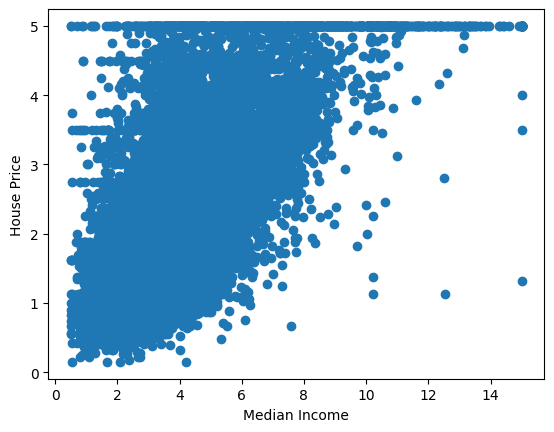

In [6]:
plt.scatter(X['MedInc'], y)
plt.xlabel('Median Income')
plt.ylabel('House Price')

По диаграмме видно, что чем больше `Median Income`, тем больше `House Price`, то есть видна прямая зависимость целевой переменной от признака `MedInc`.

## Задание 2

Постройте диаграмму рассеяния, отображающую зависимость целевой переменной от признака `Latitude`.
Какая это зависимость?

Text(0, 0.5, 'House Price')

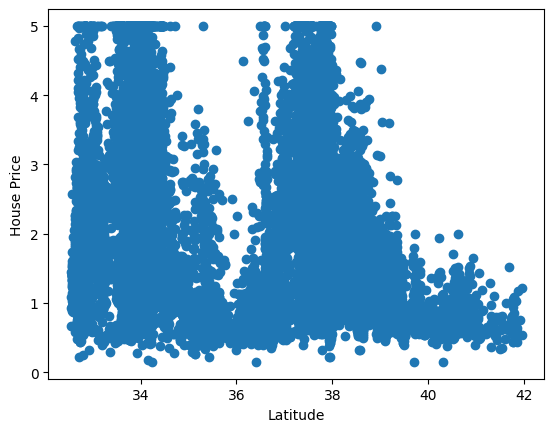

In [7]:
# ваш код здесь
plt.scatter(X['Latitude'], y)
plt.xlabel('Latitude')
plt.ylabel('House Price')

Ещё немного поисследуем данные. Полноценный разведочный анализ в рамках этого задания, конечно, не провести, но какие-то инструменты мы потрогаем.

Давайте построим тепловую карту корреляций.

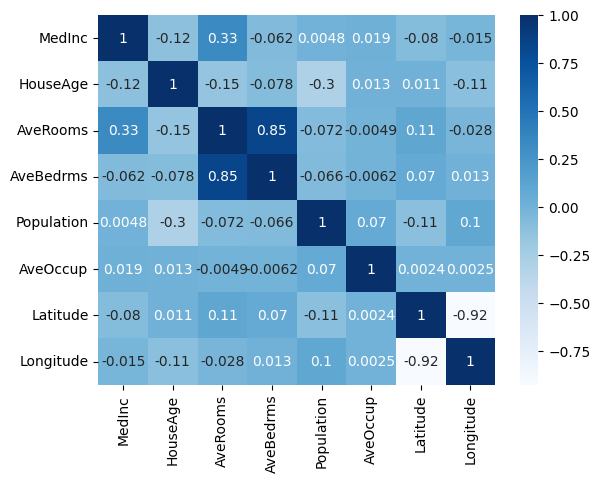

In [8]:
corr = X.corr()
sb.heatmap(corr, cmap="Blues", annot=True);

По этой матрице корреляций видно, что два наиболее зависимых признака - это `AveRooms` и `AveBedrms`.

Но интереснее посмотреть, какой признак имеет наибольшую корреляцию с целевой переменной!

## Задание 3

Добавьте к матрице `X` столбец `y` и постройте матрицу корреляций.
Какой признак имеет наибольшую по модулю корреляцию с таргетом?
После выполнения задания удалите добавленный столбец `y` из матрицы `X`.

In [12]:
# ваш код здесь Data.insert(7, "FamilySize", df['FamilySize'])

X.insert(1, "target", y)
X.head()

#corr1 = Data.corr()
#sb.heatmap(corr1, cmap="Blues", annot=True);

,MedInc,target,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,4.526,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,3.585,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,3.521,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,3.413,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,3.422,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


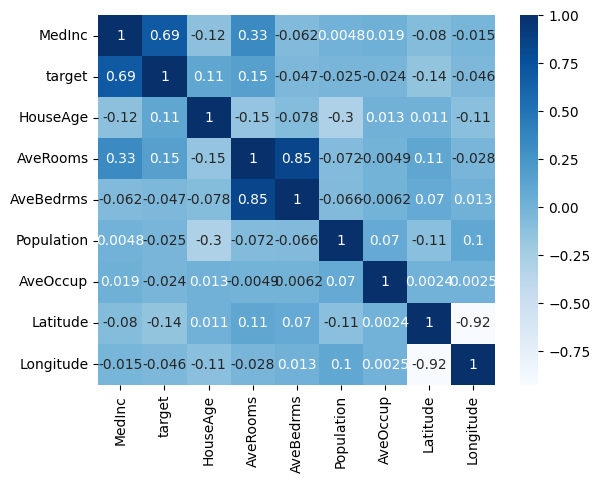

In [13]:
corr = X.corr()
sb.heatmap(corr, cmap="Blues", annot=True);

In [16]:
X = X.drop("target", axis=1)
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


Разбейте данные на тренировочную и тестовую часть (в тест отправьте 25% данных).

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [20]:
X_test.shape

(5160, 8)

##Задание 4

Сколько объектов попали в тест?

Обучите линейную регрессию с параметрами по умолчанию на тренировочных данных и сделайте предсказание на тестовых данных.

In [22]:
# ваш код здесь
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [23]:
from sklearn.linear_model import LinearRegression

# Создание модели
lr = LinearRegression()
lr.fit(X_train, y_train)

# Предсказание
Y_pred = lr.predict(X_test)

# Оценка модели
mse = mean_squared_error(y_test, Y_pred)
#r2_lr = r2_score(y_test, Y_pred)

print(f'MSE: {mse}')
#print(f'R²: {r2_lr}')
#print(round(r2_lr, 2))

MSE: 0.5411287478470685


## Задание 5

Вычислите значение метрики *MSE* на тестовых данных.
Ответ округлите до десятых.

In [ ]:
from sklearn.metrics import mean_squared_error

# ваш код здесь